## Exploring the Data

In [1]:
import pandas as pd
import geopandas as gpd

#override max columns displayed
pd.set_option('display.max_columns', None)


In [2]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
path = '../data/consolidated/'
weather_data = pd.read_csv(path+'consolidated_weather_from_centroids.csv')
columns = list(weather_data.columns)
columns[0] = 'Hour'
weather_data.columns = columns

In [4]:
weather_data.head()

,Hour,valid_time,u10,v10,d2m,t2m,ssrd,tp,latitude,longitude,file
0,0,2003-01-01 00:00:00,4.169556,-1.214157,259.06860,262.64050,0.0,1.907349e-06,48.75,-82.0,Northeast_centroid_weather
1,1,2003-01-01 01:00:00,4.098358,-1.437256,259.24854,262.53380,0.0,9.536743e-07,48.75,-82.0,Northeast_centroid_weather
2,2,2003-01-01 02:00:00,4.197708,-1.892502,258.54254,261.63712,0.0,3.814697e-06,48.75,-82.0,Northeast_centroid_weather
3,3,2003-01-01 03:00:00,3.741165,-2.575897,255.86873,258.89398,0.0,8.583069e-06,48.75,-82.0,Northeast_centroid_weather
4,4,2003-01-01 04:00:00,3.124802,-2.671005,255.42903,258.67328,0.0,9.536743e-06,48.75,-82.0,Northeast_centroid_weather


Checking if the centroids fall in the shape map.

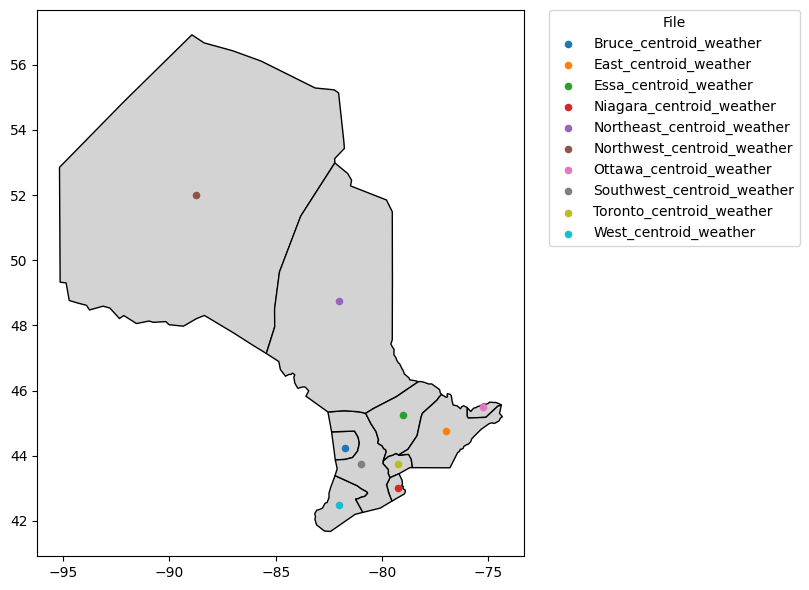

In [5]:
import matplotlib.pyplot as plt
import geopandas as gpd

# read data
shapemap = gpd.read_file('../data/tenzones_ieso.geojson')
centroids = weather_data[['longitude', 'latitude', 'file']].drop_duplicates()

fig, ax = plt.subplots(figsize=(8, 6))

# plot map
shapemap.plot(ax=ax, color='lightgrey', edgecolor='black')

# plot centroids by file
for file_name, group in centroids.groupby('file'):
    ax.scatter(
        group['longitude'],
        group['latitude'],
        s=20,
        label=file_name
    )

# legend **outside** to the right
ax.legend(
    title="File",
    bbox_to_anchor=(1.05, 1),   # x, y position relative to the axes
    loc='upper left',
    borderaxespad=0
)

plt.tight_layout()
plt.show()


In [6]:
# now read demand data
demand_data = pd.read_csv(path+'consolidatedIESOdemand.csv')
demand_data.head()

/var/folders/b8/b4rqhqs11cbcqlzjryxb92lw0000gn/T/ipykernel_60527/3917683950.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  demand_data = pd.read_csv(path+'consolidatedIESOdemand.csv')


,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Year
0,2003-05-01,1,13702,809,1284,965,765,4422,622,41,2729,617,1611,13865,163,2003
1,2003-05-01,2,13578,825,1283,923,752,4340,602,43,2731,615,1564,13678,100,2003
2,2003-05-01,3,13411,834,1277,910,751,4281,591,45,2696,596,1553,13534,123,2003
3,2003-05-01,4,13501,835,1277,922,758,4281,599,41,2724,609,1544,13590,89,2003
4,2003-05-01,5,14010,847,1268,993,804,4469,643,51,2842,579,1592,14088,78,2003


In [7]:
demand_data.head()

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Year
0,2003-05-01,1,13702,809,1284,965,765,4422,622,41,2729,617,1611,13865,163,2003
1,2003-05-01,2,13578,825,1283,923,752,4340,602,43,2731,615,1564,13678,100,2003
2,2003-05-01,3,13411,834,1277,910,751,4281,591,45,2696,596,1553,13534,123,2003
3,2003-05-01,4,13501,835,1277,922,758,4281,599,41,2724,609,1544,13590,89,2003
4,2003-05-01,5,14010,847,1268,993,804,4469,643,51,2842,579,1592,14088,78,2003


In [8]:
demand_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196391 entries, 0 to 196390
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Date            196391 non-null  object
 1   Hour            196391 non-null  int64 
 2   Ontario Demand  196391 non-null  int64 
 3   Northwest       196391 non-null  int64 
 4   Northeast       196391 non-null  int64 
 5   Ottawa          196391 non-null  int64 
 6   East            196391 non-null  int64 
 7   Toronto         196391 non-null  int64 
 8   Essa            196391 non-null  int64 
 9   Bruce           196391 non-null  int64 
 10  Southwest       196391 non-null  int64 
 11  Niagara         196391 non-null  int64 
 12  West            196391 non-null  int64 
 13  Zone Total      196391 non-null  int64 
 14  Diff            196391 non-null  object
 15  Year            196391 non-null  int64 
dtypes: int64(14), object(2)
memory usage: 24.0+ MB


Now for the price data

In [9]:
price_data = pd.read_csv(path+'prices_zonal.csv')

In [10]:
%pip install duckdb

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Data Cleaning and Feature Engineering

In [11]:
# convert fromm kelvin to celsius
weather_data['temp_C_t2m'] = weather_data['t2m'] - 273.15

In [12]:
# show average temperatures
pd.set_option('display.float_format', lambda x: '%.9f' % x)
weather_data['temp_C_t2m'].describe()

count   2004720.000000000
mean          6.662419457
std          11.948470872
min         -45.063900000
25%          -1.136880000
50%           7.163570000
75%          16.441212500
max          37.167720000
Name: temp_C_t2m, dtype: float64

In [13]:
import sys
import importlib

sys.path.append('../scripts/')
import FeatureEngineering
importlib.reload(FeatureEngineering)

dataset = FeatureEngineering.CleanedDataset(weather_data, demand_data, price_data)

In [14]:
datamerged = dataset.merge_datasets()
datamerged.sort_values(by=['file', 'Date']).head(48)

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Year,u10,v10,d2m,t2m,ssrd,tp,latitude,longitude,file,temp_C_t2m,Hour_of_Day,Reference_Richview,North West_Atikokan,North West_Pineportage,North West_Thunderbay,North East_Andrews,North East_Canyon,North East_NPIroqfalls,Ottawa_TAOHSC,East_Saunders,Toronto_Darlington,Essa_Desjoachims,Bruce_BruceB,South West_GerdauCam,Niagara_BECK2,West_Greenfield
1013754,2004-01-01 00:00:00,1,14703,811,1406,1197,903,4606,859,53,2790,542,1670,14837,134,2004,10.436722000,-2.628097500,268.592960000,274.277950000,0.000000000,0.000000954,44.250000000,-81.750000000,Bruce_centroid_weather,1.127950000,1,31.910000000,23.100000000,19.840000000,22.920000000,23.810000000,27.390000000,27.630000000,32.240000000,30.640000000,31.260000000,29.200000000,30.340000000,30.610000000,31.260000000,30.670000000
1013755,2004-01-01 01:00:00,2,14130,805,1412,1095,889,4366,794,53,2698,516,1603,14231,101,2004,10.491440000,-3.361358600,268.799200000,274.068400000,0.000000000,0.000004768,44.250000000,-81.750000000,Bruce_centroid_weather,0.918400000,2,29.550000000,21.390000000,18.370000000,21.230000000,22.040000000,25.360000000,25.590000000,29.850000000,28.380000000,28.950000000,27.040000000,28.100000000,28.340000000,28.950000000,28.400000000
1013756,2004-01-01 02:00:00,3,13575,795,1358,1053,842,4188,747,50,2582,507,1553,13675,100,2004,9.877060000,-4.244293000,269.045650000,274.056100000,0.000000000,0.000012398,44.250000000,-81.750000000,Bruce_centroid_weather,0.906100000,3,27.680000000,20.040000000,17.210000000,19.890000000,20.650000000,23.760000000,23.970000000,27.970000000,26.580000000,27.120000000,25.330000000,26.320000000,26.550000000,27.120000000,26.610000000
1013757,2004-01-01 03:00:00,4,13280,789,1355,1027,817,4046,718,52,2549,517,1512,13382,102,2004,8.785461000,-4.654403700,269.179720000,274.193270000,0.000000000,0.000010490,44.250000000,-81.750000000,Bruce_centroid_weather,1.043270000,4,25.520000000,18.470000000,15.870000000,18.340000000,19.040000000,21.910000000,22.100000000,25.790000000,24.510000000,25.000000000,23.350000000,24.260000000,24.480000000,25.000000000,24.530000000
1013758,2004-01-01 04:00:00,5,13219,779,1354,1018,811,3974,709,50,2534,529,1501,13259,40,2004,7.959579500,-4.542907700,269.336730000,274.298160000,0.000000000,0.000006199,44.250000000,-81.750000000,Bruce_centroid_weather,1.148160000,5,24.750000000,17.910000000,15.390000000,17.780000000,18.460000000,21.240000000,21.430000000,25.000000000,23.770000000,24.250000000,22.650000000,23.530000000,23.740000000,24.250000000,23.790000000
1013759,2004-01-01 05:00:00,6,13354,776,1351,1034,829,3966,716,52,2551,531,1509,13315,-39,2004,8.172653000,-3.857940700,269.578670000,274.278600000,0.000000000,0.000021935,44.250000000,-81.750000000,Bruce_centroid_weather,1.128600000,6,31.130000000,22.540000000,19.350000000,22.370000000,23.230000000,26.720000000,26.960000000,31.450000000,29.890000000,30.500000000,28.490000000,29.600000000,29.870000000,30.500000000,29.920000000
1013760,2004-01-01 06:00:00,7,13462,777,1339,1067,862,4023,742,57,2587,455,1531,13440,-22,2004,8.050049000,-3.897705000,269.640720000,274.337700000,0.000000000,0.000021458,44.250000000,-81.750000000,Bruce_centroid_weather,1.187700000,7,32.870000000,23.800000000,20.440000000,23.620000000,24.530000000,28.220000000,28.470000000,33.220000000,31.570000000,32.210000000,30.080000000,31.260000000,31.540000000,32.210000000,31.600000000
1013761,2004-01-01 07:00:00,8,13538,756,1334,1135,857,4082,774,58,2623,460,1557,13636,98,2004,7.448654000,-4.284515400,269.600280000,274.449400000,0.000000000,0.000009060,44.250000000,-81.750000000,Bruce_centroid_weather,1.299400000,8,21.250000000,15.380000000,13.210000000,15.270000000,15.860000000,18.240000000,18.400000000,21.470000000,20.410000000,20.820000000,19.440000000,20.210000000,20.390000000,20.820000000,20.430000000
1013762,2004-01-01 08:00:00,9,13675,764,1347,1216,842,4112,813,58,2665,454,1555,13826,15

In [15]:
# # make sure that date is unique
# # show non unique dates
# merged_data = dataset.merge_datasets()
# non_unique_dates = merged_data[merged_data.duplicated(subset=['Date'], keep=False)]
# non_unique_dates

In [16]:
datamerged.sort_values(by=['file', 'Date']).head(24)

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Year,u10,v10,d2m,t2m,ssrd,tp,latitude,longitude,file,temp_C_t2m,Hour_of_Day,Reference_Richview,North West_Atikokan,North West_Pineportage,North West_Thunderbay,North East_Andrews,North East_Canyon,North East_NPIroqfalls,Ottawa_TAOHSC,East_Saunders,Toronto_Darlington,Essa_Desjoachims,Bruce_BruceB,South West_GerdauCam,Niagara_BECK2,West_Greenfield
1013754,2004-01-01 00:00:00,1,14703,811,1406,1197,903,4606,859,53,2790,542,1670,14837,134,2004,10.436722000,-2.628097500,268.592960000,274.277950000,0.000000000,0.000000954,44.250000000,-81.750000000,Bruce_centroid_weather,1.127950000,1,31.910000000,23.100000000,19.840000000,22.920000000,23.810000000,27.390000000,27.630000000,32.240000000,30.640000000,31.260000000,29.200000000,30.340000000,30.610000000,31.260000000,30.670000000
1013755,2004-01-01 01:00:00,2,14130,805,1412,1095,889,4366,794,53,2698,516,1603,14231,101,2004,10.491440000,-3.361358600,268.799200000,274.068400000,0.000000000,0.000004768,44.250000000,-81.750000000,Bruce_centroid_weather,0.918400000,2,29.550000000,21.390000000,18.370000000,21.230000000,22.040000000,25.360000000,25.590000000,29.850000000,28.380000000,28.950000000,27.040000000,28.100000000,28.340000000,28.950000000,28.400000000
1013756,2004-01-01 02:00:00,3,13575,795,1358,1053,842,4188,747,50,2582,507,1553,13675,100,2004,9.877060000,-4.244293000,269.045650000,274.056100000,0.000000000,0.000012398,44.250000000,-81.750000000,Bruce_centroid_weather,0.906100000,3,27.680000000,20.040000000,17.210000000,19.890000000,20.650000000,23.760000000,23.970000000,27.970000000,26.580000000,27.120000000,25.330000000,26.320000000,26.550000000,27.120000000,26.610000000
1013757,2004-01-01 03:00:00,4,13280,789,1355,1027,817,4046,718,52,2549,517,1512,13382,102,2004,8.785461000,-4.654403700,269.179720000,274.193270000,0.000000000,0.000010490,44.250000000,-81.750000000,Bruce_centroid_weather,1.043270000,4,25.520000000,18.470000000,15.870000000,18.340000000,19.040000000,21.910000000,22.100000000,25.790000000,24.510000000,25.000000000,23.350000000,24.260000000,24.480000000,25.000000000,24.530000000
1013758,2004-01-01 04:00:00,5,13219,779,1354,1018,811,3974,709,50,2534,529,1501,13259,40,2004,7.959579500,-4.542907700,269.336730000,274.298160000,0.000000000,0.000006199,44.250000000,-81.750000000,Bruce_centroid_weather,1.148160000,5,24.750000000,17.910000000,15.390000000,17.780000000,18.460000000,21.240000000,21.430000000,25.000000000,23.770000000,24.250000000,22.650000000,23.530000000,23.740000000,24.250000000,23.790000000
1013759,2004-01-01 05:00:00,6,13354,776,1351,1034,829,3966,716,52,2551,531,1509,13315,-39,2004,8.172653000,-3.857940700,269.578670000,274.278600000,0.000000000,0.000021935,44.250000000,-81.750000000,Bruce_centroid_weather,1.128600000,6,31.130000000,22.540000000,19.350000000,22.370000000,23.230000000,26.720000000,26.960000000,31.450000000,29.890000000,30.500000000,28.490000000,29.600000000,29.870000000,30.500000000,29.920000000
1013760,2004-01-01 06:00:00,7,13462,777,1339,1067,862,4023,742,57,2587,455,1531,13440,-22,2004,8.050049000,-3.897705000,269.640720000,274.337700000,0.000000000,0.000021458,44.250000000,-81.750000000,Bruce_centroid_weather,1.187700000,7,32.870000000,23.800000000,20.440000000,23.620000000,24.530000000,28.220000000,28.470000000,33.220000000,31.570000000,32.210000000,30.080000000,31.260000000,31.540000000,32.210000000,31.600000000
1013761,2004-01-01 07:00:00,8,13538,756,1334,1135,857,4082,774,58,2623,460,1557,13636,98,2004,7.448654000,-4.284515400,269.600280000,274.449400000,0.000000000,0.000009060,44.250000000,-81.750000000,Bruce_centroid_weather,1.299400000,8,21.250000000,15.380000000,13.210000000,15.270000000,15.860000000,18.240000000,18.400000000,21.470000000,20.410000000,20.820000000,19.440000000,20.210000000,20.390000000,20.820000000,20.430000000
1013762,2004-01-01 08:00:00,9,13675,764,1347,1216,842,4112,813,58,2665,454,1555,13826,15

Test to ensure every day has a full 24 hours.

In [17]:
# merged_data['date_only'] = merged_data['Date'].dt.date

# hours_per_day = merged_data.groupby('date_only')['Date'].count()

# incomplete_days = hours_per_day[hours_per_day < 24]
# incomplete_days

In [18]:
# show average load over time
datamerged['Toronto'].describe()

count   1905110.000000000
mean       5799.795471128
std        1028.799832882
min           0.000000000
25%        5004.000000000
50%        5803.000000000
75%        6478.000000000
max       10285.000000000
Name: Toronto, dtype: float64

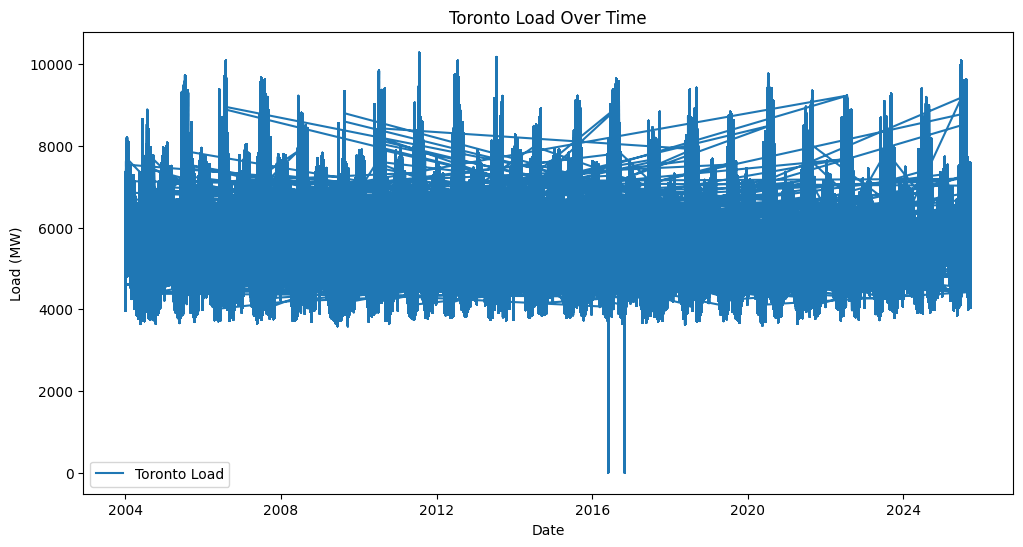

In [19]:
# graph the average prices over time
plt.figure(figsize=(12, 6))
plt.plot(datamerged['Date'], datamerged['Toronto'], label='Toronto Load')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.title('Toronto Load Over Time')
plt.legend()
plt.show()

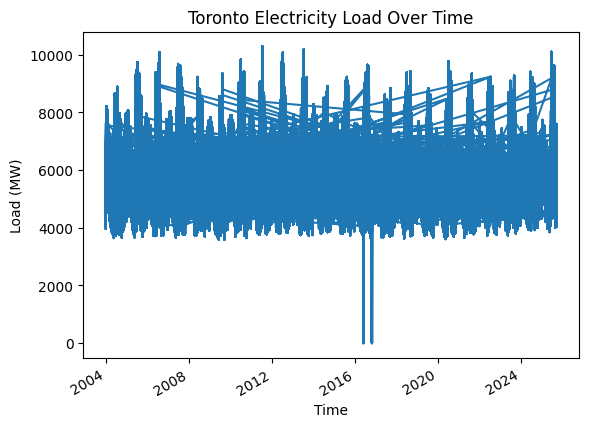

In [20]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

# extract the series
prices = datamerged['Toronto']


# datamerged['Date'] = pd.to_datetime(datamerged['Date'])
datamerged.set_index('Date', inplace=True)
loads = datamerged['Toronto']

# 1. Plot the time series
loads.plot(title='Toronto Electricity Load Over Time')
plt.xlabel('Time')
plt.ylabel('Load (MW)')
plt.show()

# 2. Autocorrelation plot to check cyclic patterns
# plot_acf(loads.dropna(), lags=180)  # Increase lags if needed
# plt.title('Autocorrelation of Toronto Electricity Load')
# plt.show()

# plt.show()


In [43]:
datamerged['Toronto'].describe()

count   35064.000000000
mean     5708.727156057
std       956.006671899
min      3644.000000000
25%      4982.000000000
50%      5699.000000000
75%      6301.000000000
max      9406.000000000
Name: Toronto, dtype: float64

# ARIMAX Model

Building an ARIMAX (AutoRegressive Integrated Moving Average with eXogenous variables) model to predict electricity load usage using weather and demand data as exogenous features.

In [21]:
datamerged = dataset.merge_datasets()

datamerged = dataset.add_calendar_features(datamerged)
datamerged = datamerged[datamerged['file'] == 'Toronto_centroid_weather']
# arimax model

In [22]:
#create dummy variables for hour, month, weekday


print(datamerged.head())
print(datamerged.columns)


datamerged['Date'] = pd.to_datetime(datamerged['Date'])

# create dummy variables for hour, month, weekday
datamerged['hour'] = datamerged['Date'].dt.hour
datamerged['month'] = datamerged['Date'].dt.month
datamerged['weekday'] = datamerged['Date'].dt.weekday

# one hot
dummies = pd.get_dummies(datamerged[['hour', 'month', 'weekday']], columns=['hour', 'month', 'weekday'], prefix=['hour', 'month', 'weekday'])


datamerged = pd.concat([datamerged, dummies], axis=1)


print(datamerged.columns)

print(datamerged.filter(regex='hour_|month_|weekday_').head())

                       Date  Hour  Ontario Demand  Northwest  Northeast  \
1013817 2014-06-14 08:00:00     8           13929        455       1068   
1013818 2014-06-14 09:00:00     9           14332        472       1123   
1013819 2014-06-14 10:00:00    10           14559        487       1129   
1013820 2014-06-14 11:00:00    11           14596        439       1125   
1013821 2014-06-14 12:00:00    12           14385        401       1105   

         Ottawa  East  Toronto  Essa  Bruce  Southwest  Niagara  West  \
1013817     743   948     5128   805     81       2818      421  1387   
1013818     782   974     5371   822     79       2867      436  1379   
1013819     804   965     5517   808     80       2901      447  1362   
1013820     818   981     5560   798     78       2887      438  1361   
1013821     808   937     5548   764     77       2864      424  1341   

         Zone Total  Diff  Year         u10          v10           d2m  \
1013817       13855   -74  2014 5.52

In [23]:
datamerged.shape

(190511, 92)

In [32]:
# the range of dates we can use for training and testing. this is to stop it from taking forever.

datamerged = datamerged[
    (datamerged['Date'].dt.year >= 2021) & 
    (datamerged['Date'].dt.year <= 2024)
]


In [33]:
datamerged.shape

(35064, 92)

In [34]:
# ============================================================================
# Reusable Data Preparation Pipeline should work for all the data models
# ============================================================================

def prepare_toronto_load_data(
    datamerged,
    zone='Toronto_centroid_weather',
    weather_vars=None,
    extra_lags=None,  # list of tuples: (original_col, new_name, lag_hours)
    test_weeks=1,
    include_daily_seasonality=True
):
    """
    Prepare Toronto load data for time series modeling.
    
    parameters:
    datamerged : pd.DataFrame
        The merged dataset with all features
    zone : str
        Location identifier to filter by
    weather_vars : list, optional
        List of weather variables to use.
    extra_lags : list of tuples, optional
        Each tuple: (column_name, new_column_name, lag_hours)
    test_weeks : int
        Number of weeks for test set (default: 1 week = 168 hours)
    include_daily_seasonality : bool
        Whether to include daily sin/cos features (default: True)
    
    Returns:
    --------
    dict containing:
        - 'train': training dataset with datetime index
        - 'test': test dataset with datetime index
        - 'target_train': target variable for training
        - 'target_test': target variable for testing
        - 'exog_features': list of exogenous feature column names
        - 'toronto_data': full processed dataset
    """
    
    if weather_vars is None:
        weather_vars = ['temp_C_t2m', 'u10', 'tp']
    if extra_lags is None:
        extra_lags = []
    
    hours_per_week = 1440
    
    # --- Filter and prepare ---
    toronto_data = datamerged[datamerged['file'] == zone].copy()
    toronto_data['Date'] = pd.to_datetime(toronto_data['Date'])
    toronto_data = toronto_data.set_index('Date').sort_index()
    
    # --- Time index for sin/cos ---
    toronto_data["t"] = np.arange(len(toronto_data))
    
    # Weekly seasonality
    period_weekly = 24 * 7
    toronto_data["sin_wk"] = np.sin(2 * np.pi * toronto_data["t"] / period_weekly)
    toronto_data["cos_wk"] = np.cos(2 * np.pi * toronto_data["t"] / period_weekly)
    
    # Daily seasonality (optional)
    if include_daily_seasonality:
        toronto_data["sin_day"] = np.sin(2 * np.pi * toronto_data["t"] / 24)
        toronto_data["cos_day"] = np.cos(2 * np.pi * toronto_data["t"] / 24)
    
    # --- Lag weather variables by 1 week ---
    for var in weather_vars:
        toronto_data[f'{var}_lag1w'] = toronto_data[var].shift(168)
    
    # --- Lag extra columns by custom hours ---
    for col, new_name, lag_hours in extra_lags:
        toronto_data[new_name] = toronto_data[col].shift(lag_hours)
    
    # --- Drop rows with NaN after lagging ---
    cols_to_check = [f'{v}_lag1w' for v in weather_vars] + ['Toronto']
    if extra_lags:
        cols_to_check += [new_name for _, new_name, _ in extra_lags]
    toronto_data = toronto_data.dropna(subset=cols_to_check)
    
    # --- Extract dummy variables ---
    hour_dummies = [c for c in toronto_data.columns if c.startswith('hour_')][1:]
    month_dummies = [c for c in toronto_data.columns if c.startswith('month_')][1:]
    weekday_dummies = [c for c in toronto_data.columns if c.startswith('weekday_')][1:]
    
    # --- Build exogenous features list ---
    seasonal_features = ["sin_wk", "cos_wk"]
    if include_daily_seasonality:
        seasonal_features += ['sin_day', 'cos_day']

    exog_features = (
        hour_dummies +
        month_dummies +
        weekday_dummies +
        [f'{v}_lag1w' for v in weather_vars] +
        seasonal_features
    )
    
    # Add IsHoliday if it exists in the data
    if 'IsHoliday' in toronto_data.columns:
        exog_features += ['IsHoliday']
    
    if extra_lags:
        exog_features += [new_name for _, new_name, _ in extra_lags]
    
    # --- Train/test split ---
    train = toronto_data.iloc[:-hours_per_week * test_weeks]
    test = toronto_data.iloc[-hours_per_week * test_weeks:]
    
    # --- Ensure numeric for exogenous features ---
    for df in [train, test]:
        df[exog_features] = df[exog_features].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
    
    target_train = train['Toronto'].astype(float)
    target_test = test['Toronto'].astype(float)
    
    return {
        'train': train,
        'test': test,
        'target_train': target_train,
        'target_test': target_test,
        'exog_features': exog_features,
        'toronto_data': toronto_data
    }


/var/folders/b8/b4rqhqs11cbcqlzjryxb92lw0000gn/T/ipykernel_60527/2201211264.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[exog_features] = df[exog_features].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
/var/folders/b8/b4rqhqs11cbcqlzjryxb92lw0000gn/T/ipykernel_60527/2201211264.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[exog_features] = df[exog_features].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
/Users/isaacwood/Documents/School/CISC 451/IESO ML P

ARIMAX RMSE with sin/cos weekly seasonality: 319.78


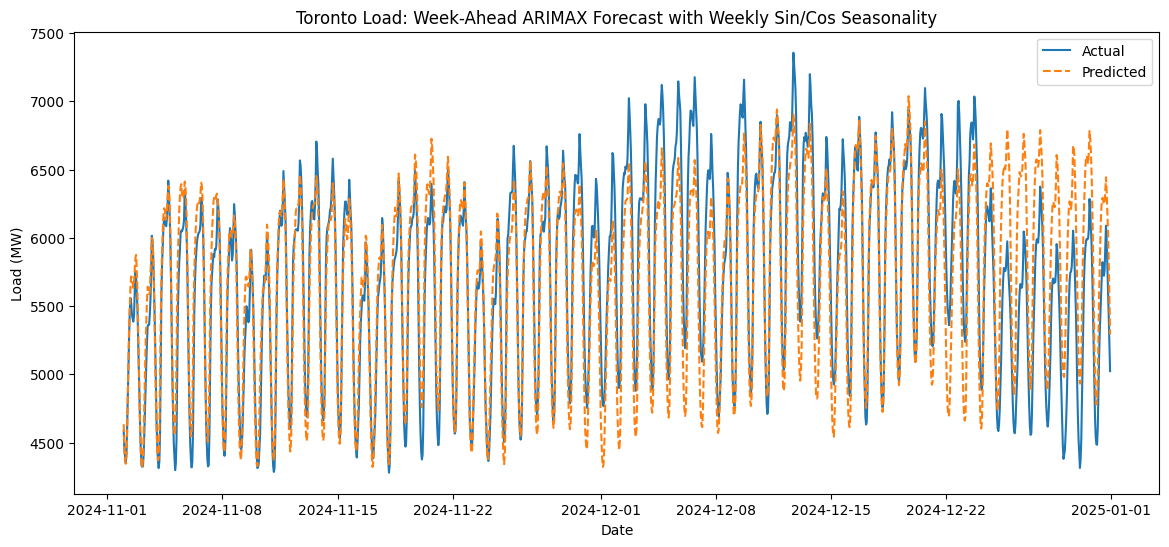

                               SARIMAX Results                                
Dep. Variable:                Toronto   No. Observations:                33456
Model:               SARIMAX(1, 1, 1)   Log Likelihood             -185318.618
Date:                Sat, 22 Nov 2025   AIC                         370743.236
Time:                        14:31:55   BIC                         371189.385
Sample:                    01-08-2021   HQIC                        370885.650
                         - 11-01-2024                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
hour_1             -24.5263      2.678     -9.159      0.000     -29.775     -19.278
hour_2             -43.7303      4.159    -10.515      0.000     -51.881     -35.579
hour_3             -58.1746 

In [35]:
# --- ARIMAX Model Preparation ---

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
hours_per_week = 168
# Prepare data using reusable function
data = prepare_toronto_load_data(
    datamerged,
    zone='Toronto_centroid_weather',
    weather_vars=['temp_C_t2m', 'u10', 'tp'],
    extra_lags = [
    ('Toronto', '1w_load', 168),
    ('Toronto_Darlington', '1w_price', 168)
]
,
    test_weeks=1,
    include_daily_seasonality=True  # Original code had daily sin/cos features
)

train = data['train']
test = data['test']
target_train = data['target_train']
target_test = data['target_test']
exog_features = data['exog_features']
toronto_data = data['toronto_data']

# ---- SARIMAX model ----
model = SARIMAX(
    target_train,
    exog=train[exog_features],
    order=(1, 1, 1),
    seasonal_order=(0, 0, 0, 0),  # daily seasonality
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit(disp=False)

# ---- Forecast ----
forecast = results.get_forecast(steps=1440, exog=test[exog_features])
pred_mean = forecast.predicted_mean

# ---- Evaluate ----
rmse = np.sqrt(mean_squared_error(target_test, pred_mean))
print(f'ARIMAX RMSE with sin/cos weekly seasonality: {rmse:.2f}')

# ---- Plot ----
plt.figure(figsize=(14, 6))
plt.plot(test.index, target_test, label='Actual')
plt.plot(test.index, pred_mean, label='Predicted', linestyle='--')
plt.title('Toronto Load: Week-Ahead ARIMAX Forecast with Weekly Sin/Cos Seasonality')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.legend()
plt.show()

# ---- Model Summary ----
print(results.summary())


In [30]:
# Create a corrupted version of test data
test_corrupted = test.copy()
test_corrupted['Toronto'] = -99999  # Impossible values

# If the model uses test['Toronto'], results will change
forecast1 = results.get_forecast(steps=1440, exog=test[exog_features])
forecast2 = results.get_forecast(steps=1440, exog=test_corrupted[exog_features])

# Check if predictions are identical
print("Predictions identical:", np.allclose(forecast1.predicted_mean, forecast2.predicted_mean))
# the predictions being identical implies that the model does not use the target variable from the test set during forecasting (eg for data leakage)

Predictions identical: True


In [36]:
# show model summary
print(rmse)

319.77954197667134


Bayesian Ridge RMSE for week-ahead forecast: 330.75


/var/folders/b8/b4rqhqs11cbcqlzjryxb92lw0000gn/T/ipykernel_60527/2201211264.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[exog_features] = df[exog_features].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
/var/folders/b8/b4rqhqs11cbcqlzjryxb92lw0000gn/T/ipykernel_60527/2201211264.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[exog_features] = df[exog_features].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)


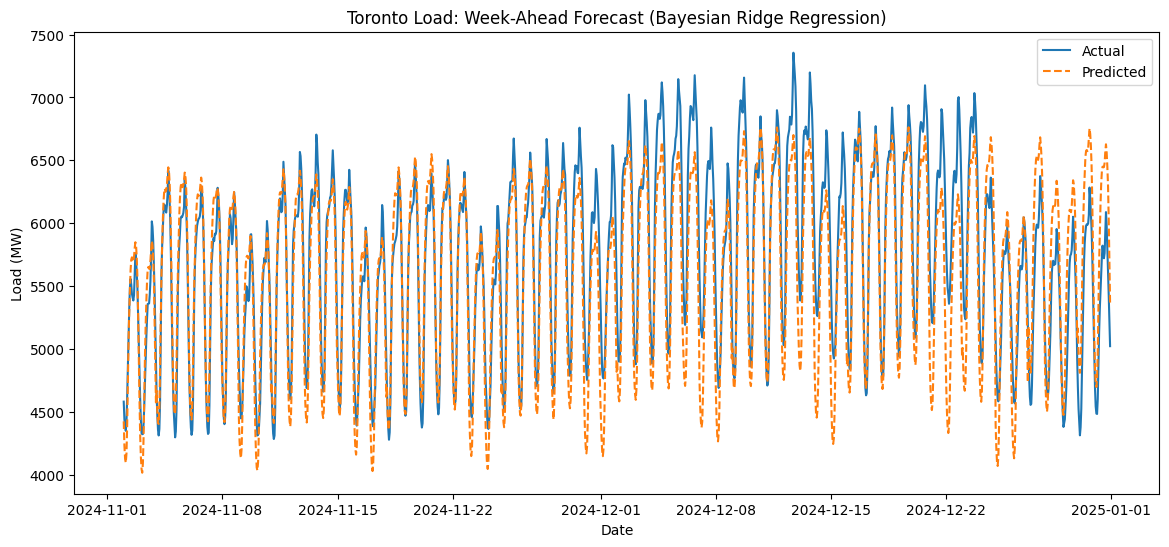

In [37]:
# --- Bayesian Ridge Regression for Toronto Load Forecast ---
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# prepare data using the reusable function
data = prepare_toronto_load_data(
    datamerged,
    zone='Toronto_centroid_weather',
    weather_vars=['temp_C_t2m', 'u10', 'tp'],
    extra_lags=[  
        ('Toronto', '1w_load', 168),
        ('Toronto_Darlington', '1w_price', 168)
    ],
    test_weeks=1,
    include_daily_seasonality=True
)

train = data['train']
test = data['test']
target_train = data['target_train']
target_test = data['target_test']
exog_features = data['exog_features']
toronto_data = data['toronto_data']

# ----------------------
# Prepare X matrices and scale features
# ----------------------
X_train = train[exog_features].astype(float)
X_test = test[exog_features].astype(float)

# Scale the features (recommended for BayesianRidge)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------
# Train Bayesian Ridge
# ----------------------
model = BayesianRidge()
model.fit(X_train_scaled, target_train)

# ----------------------
# Forecast & evaluate
# ----------------------
pred_mean = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(target_test, pred_mean))
print(f"Bayesian Ridge RMSE for week-ahead forecast: {rmse:.2f}")

# ----------------------
# Plot results
# ----------------------
plt.figure(figsize=(14,6))
plt.plot(test.index, target_test, label="Actual")
plt.plot(test.index, pred_mean, label="Predicted", linestyle="--")
plt.title("Toronto Load: Week-Ahead Forecast (Bayesian Ridge Regression)")
plt.xlabel("Date")
plt.ylabel("Load (MW)")
plt.legend()
plt.show()

In [38]:
# show which features are most important
feature_importance = pd.Series(np.abs(model.coef_), index=exog_features)
feature_importance = feature_importance.sort_values(ascending=False)

In [39]:
feature_importance

cos_day            327.139076950
1w_load            216.667221773
month_4            172.087430737
sin_day            161.694372769
month_10           153.392328433
month_5            148.066730315
weekday_6          119.068852703
hour_20            117.981584435
hour_19            115.241340550
weekday_5          107.928111554
month_7            106.603434883
sin_wk             105.557890830
hour_18            105.018204676
IsHoliday          100.232045602
month_3             99.962161390
month_8             97.897267975
hour_21             97.820034652
hour_17             89.342862506
month_11            87.929606439
month_9             71.115910390
weekday_3           70.900108587
weekday_2           70.084210179
hour_16             66.356891270
hour_22             62.106786446
month_12            59.266651345
hour_10             55.960512629
hour_9              55.843880096
hour_11             51.230064074
hour_8              50.924153426
cos_wk              50.863641471
hour_3    

Bayesian Ridge RMSE for week-ahead forecast: 330.75


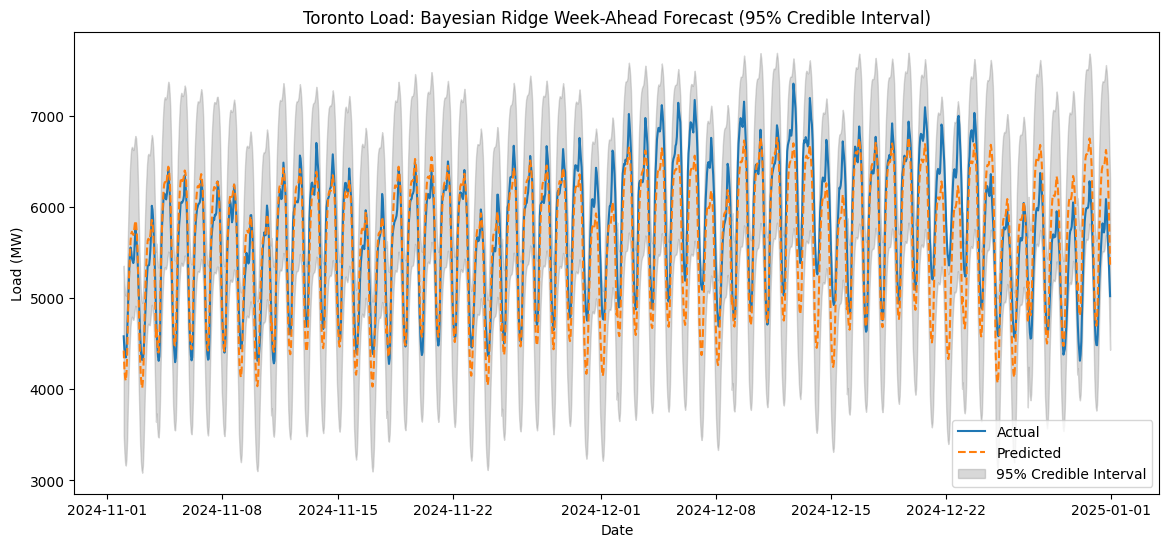

In [41]:
# ----------------------
# Forecast & credible intervals
# ----------------------

pred_mean, pred_std = model.predict(X_test_scaled, return_std=True)

# 95% credible interval
lower = pred_mean - 1.96 * pred_std
upper = pred_mean + 1.96 * pred_std

rmse = np.sqrt(mean_squared_error(target_test, pred_mean))
print(f"Bayesian Ridge RMSE for week-ahead forecast: {rmse:.2f}")

# Plot
plt.figure(figsize=(14,6))
plt.plot(test.index, target_test, label="Actual")
plt.plot(test.index, pred_mean, label="Predicted", linestyle="--")

plt.fill_between(
    test.index,
    lower,
    upper,
    color="gray",
    alpha=0.3,
    label="95% Credible Interval"
)

plt.title("Toronto Load: Bayesian Ridge Week-Ahead Forecast (95% Credible Interval)")
plt.xlabel("Date")
plt.ylabel("Load (MW)")
plt.legend()
plt.show()


In [ ]:
# Check what's actually happening
print(f"Test period start: {test.index[0]}")
print(f"Test period end: {test.index[-1]}")
print(f"Test set size: {len(test)} hours")
print(f"Test set size in days: {len(test) / 24} days")
print(f"Test set size in weeks: {len(test) / 168} weeks")

# Verify no leakage
print(f"\nTrain period end: {train.index[-1]}")
print(f"Test period start: {test.index[0]}")
print(f"Gap between train and test: {test.index[0] - train.index[-1]}")

Test period start: 2024-11-02 00:00:00
Test period end: 2024-12-31 23:00:00
Test set size: 1440 hours
Test set size in days: 60.0 days
Test set size in weeks: 8.571428571428571 weeks

Train period end: 2024-11-01 23:00:00
Test period start: 2024-11-02 00:00:00
Gap between train and test: 0 days 01:00:00
